# TRASE Widgets for Supply Chain

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

**Read soy data**

In [4]:
df = pd.read_csv("/Users/ikersanchez/Vizzuality/PROIEKTUAK/TRASE/work/data/BRAZIL_SOY_2.3/BRAZIL_SOY_2.3.csv")
df.columns = [x.lower() for x in df.columns]
df = df[['year', 'biome', 'exporter', 'importer', 'country', 'soy_equivalent_tonnes', 'territorial_deforestation_ha', 'zero_deforestation']]
df.head()

,year,biome,exporter,importer,country,soy_equivalent_tonnes,territorial_deforestation_ha,zero_deforestation
0,2003,UNKNOWN BIOME,Multigrain,Multigrain,Israel,1000.000,NaN,None
1,2003,UNKNOWN BIOME,J Motta Industria E Comercio Sa,Bunge Global Markets Spa,Italy,860.000,NaN,NaN
2,2003,UNKNOWN BIOME,Companhia Energetica De Pernambuco,Agrograin,Spain,17783.838,NaN,NaN
3,2003,UNKNOWN BIOME,Bunge,Ceval International Ltd,China,31317.950,NaN,None
4,2003,UNKNOWN BIOME,Bunge,Ceval International Ltd,Japan,35484.268,NaN,None


In [5]:
def donut_chart(labels, sizes, title, colors):
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, shadow=True)
    centre_circle = plt.Circle((0,0),0.75, fc='white',linewidth=1.25)
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    plt.axis('equal')
    plt.title(title)
    plt.show()

In [6]:
def bar_chart_hor(x, y, title, xlabel):
    plt.barh(x,y, color='#ea6869')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.show()

In [7]:
def bar_chart_ver(x, y, title, xlabel, ylabel):
    plt.bar(x,y, color='#ea6869')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

In [8]:
def stacked_bar_chart_hor(y, values, categories, title, xlabel, ylabel, width, colors):
    
    plt.figure(figsize=(10,5))

    for i in range(len(values)):
        if i == 0:
            plt.barh(y, values[i], width, label=categories[i], color = colors[i])
            past_values = np.array(values[i])
        else:
            plt.barh(y, values[i], width, left=past_values, label=categories[i], color = colors[i])
            past_values = np.array(values[i]) + past_values

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()

    plt.show()

In [9]:
def stacked_bar_chart_ver(x, values, categories, title, xlabel, ylabel, width, colors):
    
    plt.figure(figsize=(10,5))

    for i in range(len(values)):
        if i == 0:
            plt.bar(x, values[i], width, label=categories[i], color = colors[i])
            past_values = np.array(values[i])
        else:
            plt.bar(x, values[i], width, bottom=past_values, label=categories[i], color = colors[i])
            past_values = np.array(values[i]) + past_values

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()

    plt.show()

In [10]:
def top_places(df, places='biome', indicator='soy_equivalent_tonnes', top=5):
    d = {}
    for place in sorted(df[places].unique()):
        place_tmp = df[df[places] == place]
        d[place] = place_tmp[indicator].sum()
    s = [(k, d[k]) for k in sorted(d, key=d.get, reverse=True)]
    
    labels = []
    values = []
    
    for item in s:
        labels.append(item[0])
        values.append(item[1])
    
    top_labels = labels[:(top-1)]
    top_values = values[:(top-1)]

    top_labels.append('Other')
    top_values.append(np.array(values[(top-1):]).sum())
    
    return top_labels, top_values

## 2017 - Trade Volume

![title](img/2017_Trade_Volume.png)

**Global**

In [11]:
year = 2017
tmp = df[df['year'] == year]

In [12]:
f"{tmp['soy_equivalent_tonnes'].sum()} t of Soy was produced in Brazil in {year}"

'114599167.9870561 t of Soy was produced in Brazil in 2017'

**Biome / Exporter / Port / Importer / Country**

In [13]:
filter='country'
title='Biome'

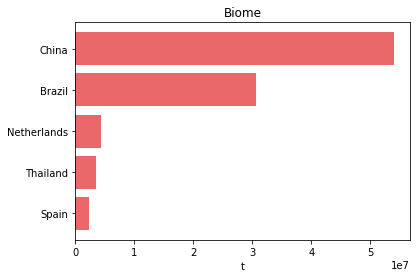

In [14]:
top_labels, top_values = top_places(tmp, places=filter, indicator='soy_equivalent_tonnes', top=6)
top_labels = top_labels[:-1][::-1]
top_values = top_values[:-1][::-1]
bar_chart_hor(x=top_labels, y=top_values, title=title, xlabel='t')

## 2003-2017 - Trade Volume

![title](img/2003-2017_Trade_Volume.png)

**Global**

In [492]:
soy_volume = []
years = []
for year in df["year"].unique():
    tmp = df[df["year"] == year]
    soy_volume.append(tmp['soy_equivalent_tonnes'].sum())
    years.append(year)

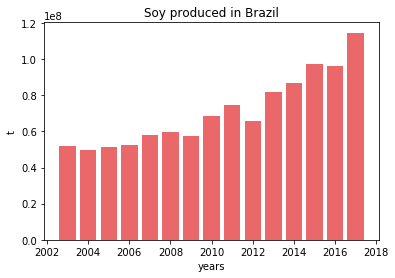

In [493]:
bar_chart_ver(x=years, y=soy_volume, title='Soy produced in Brazil', xlabel='years', ylabel='t')

**Biome / Exporter / Port / Importer / Country**

In [15]:
filter='country'
title='Biome'

In [16]:
tmp = df
top_labels, top_values = top_places(tmp, places=filter, indicator='soy_equivalent_tonnes', top=6)
top_labels = top_labels[:-1]

In [17]:
values = []
years = df["year"].unique()
for label in top_labels:
    value_label = []
    for year in years:

        tmp = df[(df["year"] == year) & (df[filter] == label)]
        
        value_label.append(tmp['soy_equivalent_tonnes'].sum())
    values.append(value_label)

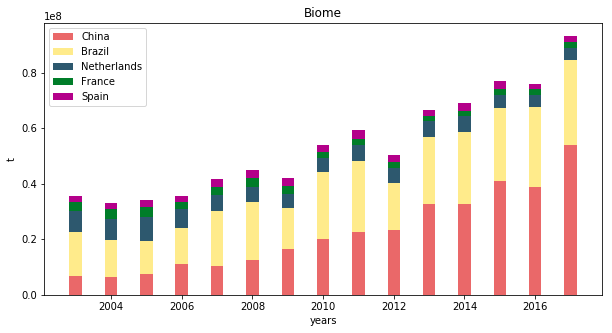

In [18]:
stacked_bar_chart_ver(x=years, values=values, categories=top_labels, title=title, xlabel='years', ylabel='t', width = 0.35,
                      colors = ['#ea6869', '#ffeb8b', '#2d586e', '#007d29', '#b4008a', '#06ff67', '#8339aa', '#f3fb00', '#7193ff'])

## 2017 - Trade Volume - Zero Deforestation Commitment (Exporter)

![title](img/2017_Trade_Volume_Zero_Deforestation.png)

**Global**

In [525]:
year = 2017
tmp = df[df['year'] == year]
tmp.fillna('Unknown', axis=1, inplace= True)

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3790: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [526]:
labels = ['Unknown', 'Company commitment', 'None', 'Soy Moratorium']
sizes = []
for label in labels:
    sizes.append(tmp[tmp['zero_deforestation'] == label]['soy_equivalent_tonnes'].count())    

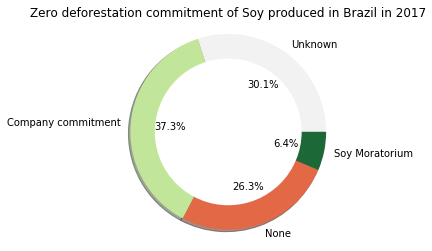

In [527]:
# Donut chart
donut_chart(labels=labels, sizes=sizes, 
            title=f'Zero deforestation commitment of Soy produced in Brazil in {year}',
           colors=['#f2f2f2', '#C2E699', '#e36845', '#1D6837'])

**Biome / Exporter / Port / Importer / Country**

In [536]:
filter = 'biome'
title = 'Biome'

In [537]:
top_labels, top_values = top_places(tmp, places=filter, indicator='soy_equivalent_tonnes', top=6)
top_labels = top_labels[::-1][1:]
top_values = top_values[::-1][1:]

In [538]:
values = []
categories = ['Unknown', 'Company commitment', 'None', 'Soy Moratorium']
for cat in categories:
    value_label = []
    for label in top_labels:

        tmp_label = tmp[(tmp['zero_deforestation'] == cat) & (tmp[filter] == label)]
        
        value_label.append(tmp_label['soy_equivalent_tonnes'].sum())
    values.append(value_label)

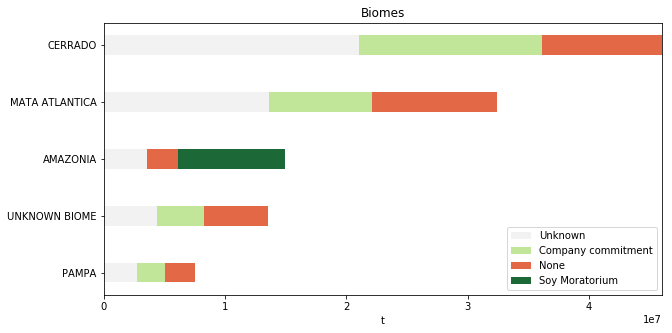

In [539]:
stacked_bar_chart_hor(y=top_labels, values=values, categories=categories, title=title, xlabel='t', ylabel='', width = 0.35,
                     colors=['#f2f2f2', '#C2E699', '#e36845', '#1D6837'])

## 2003-2017 - Trade Volume - Zero Deforestation Commitment (Exporter)

![title](img/2003-2017_Trade_Volume_Zero_Deforestation.png)

**Global**

In [540]:
tmp = df
tmp.fillna('Unknown', axis=1, inplace= True)

In [541]:
values = []
labels = ['Unknown', 'Company commitment', 'None', 'Soy Moratorium']
years = tmp["year"].unique()
for label in labels:
    value_label = []
    for year in years:

        tmp_label = tmp[(tmp["year"] == year) & (tmp['zero_deforestation'] == label)]
        
        value_label.append(tmp_label['soy_equivalent_tonnes'].sum())
    values.append(value_label)

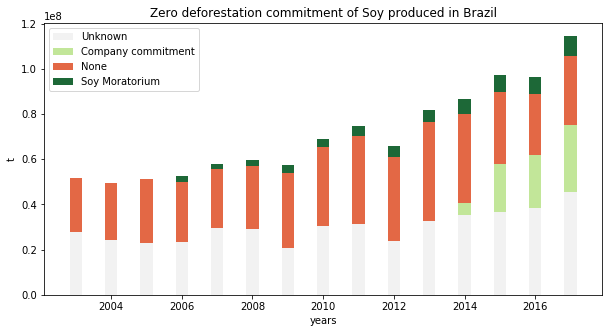

In [542]:
stacked_bar_chart_ver(x=years, values=values, categories=labels, title='Zero deforestation commitment of Soy produced in Brazil', xlabel='years', ylabel='t', width = 0.35,
                      colors = ['#f2f2f2', '#C2E699', '#e36845', '#1D6837'])

**Biome / Exporter / Port / Importer / Country**

In [565]:
filter_1 = 'biome'
filter_2 = 'AMAZONIA'

In [566]:
tmp_biome = tmp[tmp[filter_1] == filter_2]

In [567]:
values = []
years = tmp_biome["year"].unique()
for label in labels:
    value_label = []
    for year in years:

        tmp_label = tmp_biome[(tmp_biome["year"] == year) & (tmp_biome['zero_deforestation'] == label)]
        
        value_label.append(tmp_label['soy_equivalent_tonnes'].sum())
    values.append(value_label)

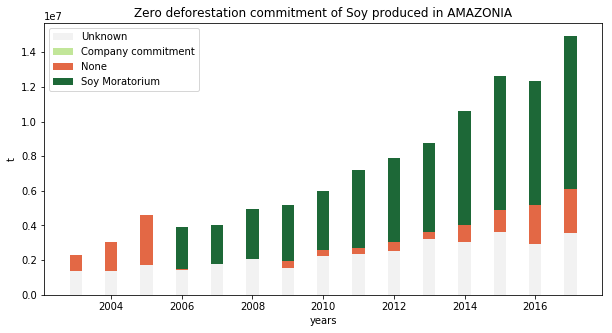

In [568]:
stacked_bar_chart_ver(x=years, values=values, categories=labels, title=f'Zero deforestation commitment of Soy produced in {filter_2}', xlabel='years', ylabel='t', width = 0.35,
                      colors = ['#f2f2f2', '#C2E699', '#e36845', '#1D6837'])

## 2017 - Trade Volume - Selection

![title](img/2017_Trade_Volume_Selection.png)

**Global**

In [569]:
year = 2017
tmp = df[df['year'] == year]
tmp.fillna('Unknown', axis=1, inplace= True)

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3790: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [573]:
labels = ['Netherlands', 'Thailand', 'Spain', 'South Korea', 'Cuba']
sizes = []
for label in labels:
    sizes.append(tmp[tmp['country'] == label]['soy_equivalent_tonnes'].count())    

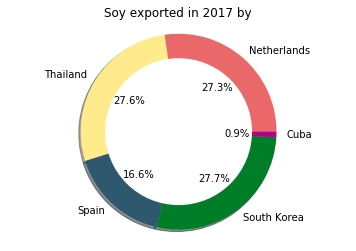

In [579]:
# Donut chart
donut_chart(labels=labels, sizes=sizes, 
            title=f'Soy exported in {year} by',
           colors=['#ea6869', '#ffeb8b', '#2d586e', '#007d29', '#b4008a'])

**Biome / Exporter / Port / Importer / Country**

In [580]:
filter = 'biome'
title = 'Biome'

In [581]:
top_labels, top_values = top_places(tmp, places=filter, indicator='soy_equivalent_tonnes', top=6)
top_labels = top_labels[::-1][1:]
top_values = top_values[::-1][1:]

In [582]:
values = []
categories = ['Netherlands', 'Thailand', 'Spain', 'South Korea', 'Cuba']
for cat in categories:
    value_label = []
    for label in top_labels:

        tmp_label = tmp[(tmp['country'] == cat) & (tmp[filter] == label)]
        
        value_label.append(tmp_label['soy_equivalent_tonnes'].sum())
    values.append(value_label)

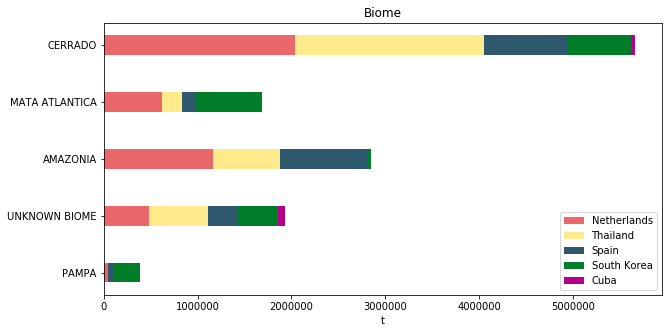

In [583]:
stacked_bar_chart_hor(y=top_labels, values=values, categories=categories, title=title, xlabel='t', ylabel='', width = 0.35,
                     colors=['#ea6869', '#ffeb8b', '#2d586e', '#007d29', '#b4008a'])